# ASSIGNMNET 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Question 1

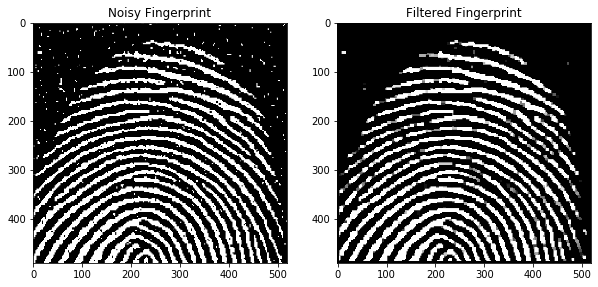

In [2]:
# Define the structuring element, k= 3,5 - Different sizes of the structuring element
k=5
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

#Erosion without using inbuilt cv2 function for morphology
def Erosion(img1):
    
    #Acquire size of the image
    m,n= img1.shape 

    #Define new image
    imgErode= np.zeros((m,n), dtype=np.uint8)

    for i in range(constant, m-constant):
      for j in range(constant,n-constant):
        temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
        product= temp*SE
        imgErode[i,j]= np.min(product)
        
    return imgErode
    
#Dilation operation without using inbuilt CV2 function
def Dilation(img1):
    
    #Acquire size of the image
    m,n= img1.shape 

    #Define new image to store the pixels of dilated image
    imgDilate= np.zeros((m,n), dtype=np.uint8)
    
    for i in range(constant, m-constant):
      for j in range(constant,n-constant):
        temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
        product= temp*SE
        imgDilate[i,j]= np.max(product)
        
    return imgDilate

#Read the image 
img1= cv2.imread("C:\\Users\\Sanchita\\Desktop\\CSL442_IVP_S21_Programming_Assignment-2\\fingerprint.png",0)

#opening
erosion1 = Erosion(img1)
dilation1 = Dilation(erosion1)

#closing
dilation2 = Dilation(dilation1)
erosion2 = Erosion(dilation2)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Noisy Fingerprint')
plt.imshow(img1, cmap="gray")

plt.subplot(1,2,2)
plt.title('Filtered Fingerprint')
plt.imshow(erosion2, cmap="gray")

## Question 2


number of disks : 14


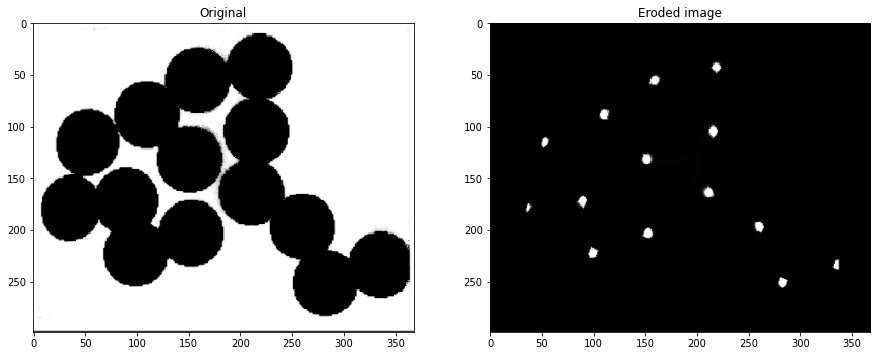

In [5]:
def CountDots(img):
    # threshold
    th, threshed = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

    # findcontours
    cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

    # filter by area
    s1 = 0
    s2 = 100
    xcnts = []

    for cnt in cnts:
        if s1<cv2.contourArea(cnt) <s2:
            xcnts.append(cnt)

    # printing output
    print("\nnumber of disks : {}".format(len(xcnts)))
    
#Read the image 
img1= cv2.imread("C:\\Users\\Sanchita\\Desktop\\CSL442_IVP_S21_Programming_Assignment-2\\disks.png",0)

mask = cv2.bitwise_not(img1)
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(55,55))
eroded = cv2.erode(mask,SE)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img1, cmap="gray")

plt.subplot(1,2,2)
plt.title('Eroded image')
plt.imshow(eroded, cmap="gray")

CountDots(eroded)

## Question 3

C:\Users\Sanchita\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Sanchita\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in arccos


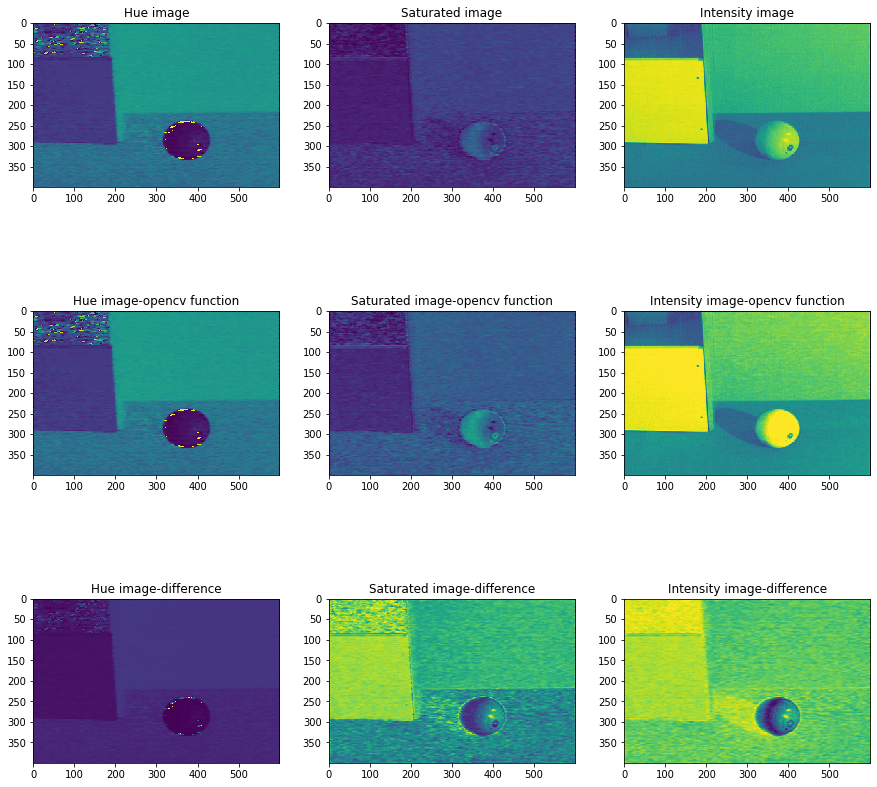

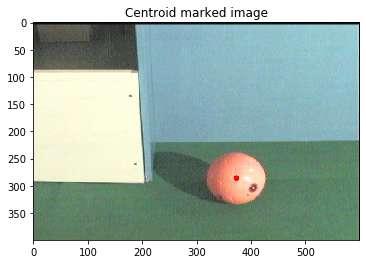

In [6]:
def Myrgb2hsi(rgb_img):
    
    #Save the number of rows and columns of the original image
    row = np.shape(rgb_img)[0]
    col = np.shape(rgb_img)[1]
    
    #Copy the original image
    hsi_img = rgb_img.copy()
    
    #Channel splitting the image
    B,G,R = cv2.split(rgb_img)
    
    # Normalize the channel to [0,1]
    [B,G,R] = [ i/ 255.0 for i in ([B,G,R])]
    H = np.zeros((row, col))    #Define H channel
    I = (R + G + B) / 3.0       #Calculate I channel
    S = np.zeros((row,col))      #Define S channel
    
    for i in range(row):
        den = np.sqrt((R[i]-G[i])**2+(R[i]-B[i])*(G[i]-B[i]))
        thetha = np.arccos(0.5*(R[i]-B[i]+R[i]-G[i])/den)   #Calculate the included angle
        h = np.zeros(col)               #Define temporary array
        
        #den>0 and G>=B element h is assigned thetha
        h[B[i]<=G[i]] = thetha[B[i]<=G[i]]
        
        #den>0 and the element h of g<= b is assigned thetha
        h[G[i]<B[i]] = 2*np.pi-thetha[G[i]<B[i]]
        
        #den<0 element h is assigned a value of 0
        h[den == 0] = 0
        
        H[i] = h/(2*np.pi)      #Assign to the H channel after radiating
        
    #Calculate S channel
    for i in range(row):
        min = []
        #Find the minimum value of each group of RGB values
        for j in range(col):
            arr = [B[i][j],G[i][j],R[i][j]]
            min.append(np.min(arr))
        min = np.array(min)
        
        #Calculate S channel
        S[i] = 1 - min*3/(R[i]+B[i]+G[i])
        
        #I is 0 directly assigned to 0
        S[i][R[i]+B[i]+G[i] == 0] = 0
    
    return H*255,S*255,I*255


#Read the image
img1= cv2.imread("C:\\Users\\Sanchita\\Desktop\\CSL442_IVP_S21_Programming_Assignment-2\\ball.bmp")

h,s,i=Myrgb2hsi(img1)

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('Hue image')
plt.imshow(h)

plt.subplot(3,3,2)
plt.title('Saturated image')
plt.imshow(s)

plt.subplot(3,3,3)
plt.title('Intensity image')
plt.imshow(i)

out=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
out = cv2.cvtColor(out, cv2.COLOR_RGB2HSV)

plt.subplot(3,3,4)
plt.title('Hue image-opencv function')
plt.imshow(out[:,:,0])

plt.subplot(3,3,5)
plt.title('Saturated image-opencv function')
plt.imshow(out[:,:,1])

plt.subplot(3,3,6)
plt.title('Intensity image-opencv function')
plt.imshow(out[:,:,2])

plt.subplot(3,3,7)
plt.title('Hue image-difference')
plt.imshow(h-out[:,:,0])

plt.subplot(3,3,8)
plt.title('Saturated image-difference')
plt.imshow(s-out[:,:,1])

plt.subplot(3,3,9)
plt.title('Intensity image-difference')
plt.imshow(i-out[:,:,2])

#thresholding in hue space
h1 = (h/np.max(h))*255
h1 = h1.astype('uint8')
ret,h1 = cv2.threshold(h,30,255,cv2.THRESH_BINARY_INV)

#morphological processing
ele = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
h1 = cv2.morphologyEx(h1, cv2.MORPH_OPEN, ele)
h1 = cv2.morphologyEx(h1, cv2.MORPH_CLOSE, ele)

#centroid calculation
M = cv2.moments(h1)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

#mark centroid on original image with red color
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
cv2.circle(img1, (cX, cY), 5, (255,0,0), -1)

plt.figure()
plt.title("Centroid marked image")
plt.imshow(img1)

## Question 4

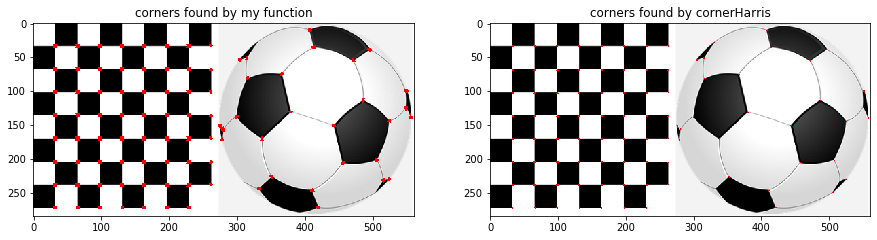

In [10]:
def Harris_Corner_Detector(img,img1):
    
    #calucate image gradient
    dy, dx = np.gradient(img1)
    Ixx = cv2.GaussianBlur(dx**2,(5,5),5)
    Ixy = cv2.GaussianBlur(dy*dx,(5,5),5)
    Iyy = cv2.GaussianBlur(dy**2,(5,5),5)
    
    k =0.05

    # determinant
    detA = Ixx * Iyy - Ixy ** 2
    # trace
    traceA = Ixx + Iyy

    harris_response = (detA - k * traceA ** 2)/100000
    
    img_copy_for_corners = np.copy(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if harris_response[i,j] > 1:
                # this is a corner
                img_copy_for_corners[i, j,0] = 255
                img_copy_for_corners[i, j,1] = 0
                img_copy_for_corners[i, j,2] = 0
                
    return img_copy_for_corners


#Read the image
img = cv2.imread("C:\\Users\\Sanchita\\Desktop\\CSL442_IVP_S21_Programming_Assignment-2\\corner_test.png")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corner_marked_img = Harris_Corner_Detector(img,img1)
  
# apply the cv2.cornerHarris method to detect the corners with appropriate values as input parameters
dest = cv2.cornerHarris(np.float32(img1), 2, 3, 0.05)
    
# Reverting back to the original image, with optimal threshold value
img[dest > 0.01 * dest.max()]=[255, 0, 0]
  
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('corners found by my function')
plt.imshow(corner_marked_img)

plt.subplot(1,2,2)
plt.title('corners found by cornerHarris')
plt.imshow(img)


## Question 5

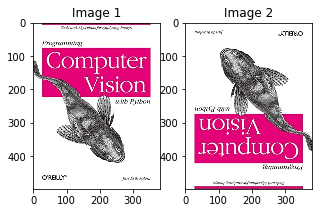

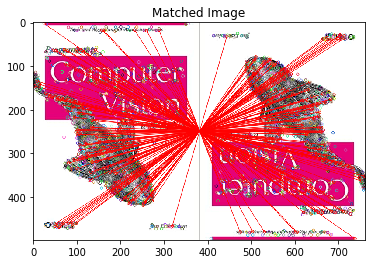

In [12]:
img1 = cv2.imread("C:\\Users\\Sanchita\\Desktop\\CSL442_IVP_S21_Programming_Assignment-2\\FM_img1.jpg") 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("C:\\Users\\Sanchita\\Desktop\\CSL442_IVP_S21_Programming_Assignment-2\\FM_img2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.title('Image 1')
plt.imshow(img1)

plt.subplot(1,2,2)
plt.title('Image 2')
plt.imshow(img2)

sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

index_params = dict(algorithm = 0, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches[::5]:
    if m.distance < 0.08*n.distance:
        good.append(m)
        
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]) #.reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]) #.reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

    else:
        matchesMask = None
            
draw_params = dict(matchColor = (255,0,0), # draw matches in red color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 0)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure()
plt.title('Matched Image')
plt.imshow(img3)